# iris Data Keras Modeling

* Colab File Upload
 - iris.csv

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

KeyboardInterrupt: ignored

* pandas DataFrame

In [0]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [0]:
iris.Species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [0]:
iris_TR = iris.values
iris_TR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [0]:
TR_X = iris_TR[:,0:4].astype(float)
TR_Y = iris_TR[:,4]
# iris 첫번째에서 4번째꺼 까지 숫자만 빼온다. 
TR_X.shape, TR_Y.shape

((150, 4), (150,))

> ## 3) Normalization with Keras

* normalize( )

In [0]:
import keras

TR_XN = keras.utils.normalize(TR_X)
# 0에서 1사이의 값으로 바뀐다.
TR_XN

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

> ## 4) One Hot Encoding with sklearn Package & Keras

* ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]




In [0]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
encoder.fit(TR_Y)
TR_YL = encoder.transform(TR_Y)

TR_YL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* to_categorical( )

In [0]:
TR_YO = keras.utils.to_categorical(TR_YL)
# 데이터 전처리 끝

TR_YO

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 5) Train & Test Split with sklearn Package

* 8:2

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(TR_XN, TR_YO, 
                                                    test_size = 0.2, 
                                                    random_state = 2045) 
 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [0]:
from keras import models
from keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [0]:
Model_iris = models.Sequential()
# keras 모델을 정의한것이다. 

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,))) # 첫번째 히든레이어의 노드 갯수는 16개 그리고 # input은 4개 다 쓰겠다.
Model_iris.add(layers.Dense(8, activation = 'relu')) # 두번째 히든레이어의 노드 갯수는 8개이다.
Model_iris.add(layers.Dense(3, activation = 'softmax')) # 다중분류할 것이니까 softmax할 것이다.

* 모델 구조 확인

In [0]:
Model_iris.summary() #신경망 구조를 볼 수 있다. 끝은 output 레이어 , 곱하기하는 것은 weight, 더하기하는 것은 bias

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [0]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'rmsprop',
                   metrics = ['accuracy'])
# loss, optimizer, metrics 다중분류는 acc uracy만 쓴다.

> ## 4) Model Fit

* 모델 학습 수행

In [0]:
History_iris = Model_iris.fit(x_train, y_train,
                              epochs = 500, # 총 500번
                              batch_size = 7, # 한번에 7번개씩 경사하강
                              validation_data = (x_test, y_test)) # 중간평가할 때 test 데이터를 쓰겠다. 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 120 samples, validate on 30 samples
Epoch 1/500





120/120 [==============================] - 1s 5ms/step - loss: 1.0499 - acc: 0.3417 - val_loss: 1.0547 - val_acc: 0.3000
Epoch 2/500
120/120 [==============================] - 0s 217us/step - loss: 1.0323 - acc: 0.3417 - val_loss: 1.0435 - val_acc: 0.3667
Epoch 3/500
120/120 [==============================] - 0s 215us/step - loss: 1.0171 - acc: 0.4667 - val_loss: 1.0310 - val_acc: 0.2667
Epoch 4/500
120/120 [==============================] - 0s 216us/step - loss: 1.0030 - acc: 0.4417 - val_loss: 1.0146 - val_acc: 0.2667
Epoch 5/500
120/120 [==============================] - 0s 198us/step - loss: 0.9908 - acc: 0.4167 - val_loss: 1.0030 - val_acc: 0.5667
Epoch 6/500
120/120 [==============================] - 0s 196us/step - loss: 0.9797 - acc: 0.6500 - val_loss: 0.9916 - val_acc: 0.6000
Epoch 7/500
120/120 [========================

> ## 5) 학습 결과 시각화

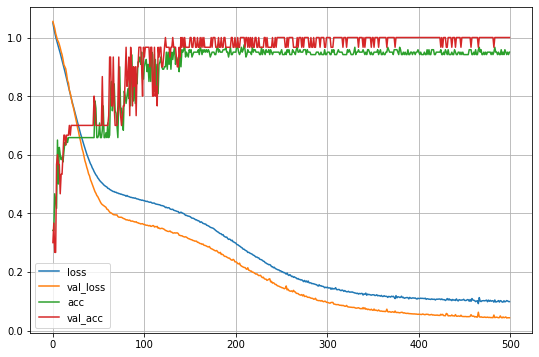

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['acc'])
plt.plot(History_iris.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [22]:
loss, accuracy = Model_iris.evaluate(x_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))
# 모델을 평가한 것이다. 소숫점 2째짜리 까지 

30/30 [==============================] - 0s 74us/step
Loss = 0.04
Accuracy = 1.00


> ## 7) Model Predict

* Probability

In [23]:
Model_iris.predict(x_test)
# 실제 적용한 것이다.

array([[1.00000000e+00, 3.05332218e-11, 3.26025820e-08],
       [9.99997854e-01, 1.87664142e-08, 2.14794932e-06],
       [8.69256489e-09, 9.98470366e-01, 1.52962981e-03],
       [1.70842973e-09, 3.20726959e-03, 9.96792734e-01],
       [1.00000000e+00, 4.20437036e-12, 8.56038795e-09],
       [3.44069573e-09, 9.98359621e-01, 1.64039317e-03],
       [6.44572706e-09, 3.73003893e-02, 9.62699592e-01],
       [1.00000000e+00, 3.04915788e-13, 1.44792811e-09],
       [3.25568861e-09, 9.20247193e-03, 9.90797520e-01],
       [1.00000000e+00, 5.70646794e-11, 4.77799915e-08],
       [2.40227571e-08, 6.89398825e-01, 3.10601205e-01],
       [1.08815206e-08, 1.00978442e-01, 8.99021506e-01],
       [7.78995002e-09, 9.85191166e-01, 1.48089118e-02],
       [1.00000000e+00, 3.12517210e-13, 1.47227608e-09],
       [1.00000000e+00, 8.75068421e-12, 1.40634437e-08],
       [1.11731921e-08, 9.66953874e-01, 3.30461822e-02],
       [1.33042830e-08, 9.45320845e-01, 5.46791665e-02],
       [1.00000000e+00, 4.03042

* Class

In [24]:
y_hat = Model_iris.predict_classes(x_test)
y_hat
# 더 편하게 볼 수 있다.

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* One Hot Encoding to Array

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* Confusion Matrix & Claasification Report

In [27]:
confusion_matrix(y, y_hat) # 제대로 분류 했다.

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [28]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [30]:
Model_iris.save('Model_iris.h5')
# 저장 방법. 파라미터들의 집합이다. 243개의 숫자가 들어있다. 로컬 파일 시스템에 저장된다.
!ls

iris.csv  Model_iris.h5  sample_data


* Download Colab File System to Local File System

In [0]:
from google.colab import files

files.download('Model_iris.h5')

* Load from Colab File System

In [0]:
from keras.models import load_model

Model_iris = load_model('Model_iris.h5')

# 모델을 심으면 작동시킬 수 있다.


> ## 2) Google Drive

* Mount Google Drive

In [33]:
from google.colab import drive

drive.mount('/content/drive')
# Local에 저장해두어야 한다. 코랩은 24시간이 지나면 사라지기 때문에 별로이다. 

KeyboardInterrupt: ignored

* Check Mounted_Drive

In [0]:
!ls '/content/drive/My Drive/Colab Notebooks/datasets'

cats_and_dogs_small  jena_climate  PII.csv


In [0]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')
DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


* Save to Mounted Google Drive Directory

In [0]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/Model_iris.h5')

In [0]:
!ls '/content/drive/My Drive/Colab Notebooks/models'

dogs_and_cats_augmentation.h5  dogs_and_cats_small.h5  yena_lstm.h5
dogs_and_cats_feature.h5       Model_iris.h5	       yena_simpleRNN.h5
dogs_and_cats_fineTuning.h5    yena_lstm_dropout.h5    yena_stacked_GRU.h5
dogs_and_cats_pretrained.h5    yena_lstm_GPU.h5


* Load from Mounted Google Drive Directory

In [0]:
from keras.models import load_model

Model_iris = load_model('/content/drive/My Drive/Colab Notebooks/models/Model_iris.h5')

# 
# 
# 
# The End
# 
# 
# 